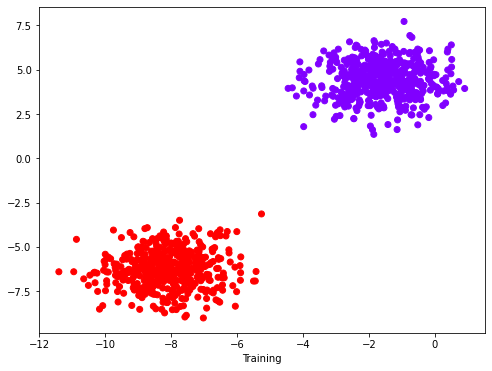

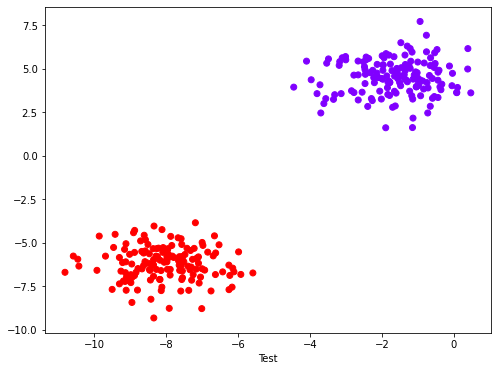

In [ ]:
# example of gaussian naive bayes
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
# https://scikit-learn.org/stable/modules/naive_bayes.html

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=5, cluster_std=1.0, random_state=1)

# plot
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow')
plt.xlabel("Training")
plt.show()


# define the model
model = GaussianNB()
# fit the model
history = model.fit(X, y)

#test
X_test, y_test = make_blobs(n_samples=300, centers=2, n_features=5, cluster_std=1.0, random_state=1)
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='rainbow')
plt.xlabel("Test")
plt.show()

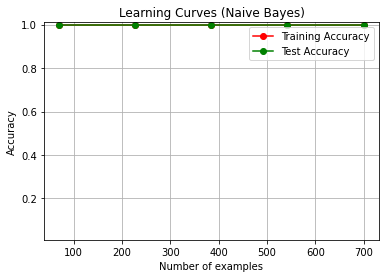

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
  plt.figure()
  plt.title(title)
  if ylim is not None:
      plt.ylim(*ylim)
  plt.xlabel("Number of examples")
  plt.ylabel("Accuracy")
  train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.grid()

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test Accuracy")
  plt.legend(loc="best")
  return plt




if __name__=='__main__':
	title = "Learning Curves (Naive Bayes)"

	cv = ShuffleSplit(n_splits=1000, test_size=0.3, random_state=1)
	
	estimator = GaussianNB()
	plot_learning_curve(estimator, title, X, y, ylim=(0.01, 1.01), cv=cv, n_jobs=5)
